In [1]:
from tbats import BATS, TBATS
from tbats import TBATS
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\\Aayush Kandpal\\Downloads\\SBIN.NS (2).csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-04,334.100006,342.950012,331.850006,341.850006,341.850006,26789483.0
1,2019-12-05,343.000000,344.600006,335.149994,336.200012,336.200012,30429507.0
2,2019-12-06,336.700012,337.649994,318.000000,320.000000,320.000000,47027528.0
3,2019-12-09,318.950012,327.649994,314.750000,316.700012,316.700012,52435239.0
4,2019-12-10,317.200012,322.649994,312.250000,313.399994,313.399994,52155809.0


In [4]:
df= df.drop(['High','Low','Adj Close','Volume'],axis=1)
df=df.dropna()

In [11]:
train, test = df.loc[df['Date'] <= '2020-09-16'], df.loc[df['Date'] > '2020-09-16']
y=train.Close.values
estimator = TBATS(seasonal_periods=[7,197])

    # Fit model
fitted_model = estimator.fit(y)

    # Forecast 14 steps ahead
y_forecasted = fitted_model.forecast(steps=69)

    # Summarize fitted model
print(fitted_model.summary())

Use Box-Cox: False
Use trend: True
Use damped trend: False
Seasonal periods: [  7. 197.]
Seasonal harmonics [ 1 24]
ARMA errors (p, q): (4, 2)
Smoothing (Alpha): -0.020103
Trend (Beta): 0.058849
Damping Parameter (Phi): 1.000000
Seasonal Parameters (Gamma): [ 4.95937713e-05 -9.24500727e-06  3.88570065e-05 -1.44539371e-05]
AR coefficients [ 3.88570065e-05 -1.44539371e-05 -4.58856915e-01 -1.02723446e-01]
MA coefficients [-0.71560148 -0.17750641]
Seed vector [ 3.16542546e+02 -1.02119824e+00  9.51596304e-01  1.17082364e+00
  4.19430955e+01 -1.85159525e+01  2.44199799e+00  6.41276294e+00
 -9.88250052e+00 -4.00722420e-01 -6.64194171e-01 -1.42048745e+00
 -2.31256076e+00 -4.95602203e-02  5.74772050e-02 -7.04579557e-01
  1.81215673e+00  2.31803658e-01  7.33033435e-01  2.03232597e+00
  4.29891815e-02 -7.35284585e-01 -2.06868133e-01  1.14776129e+00
  1.10945152e-02  2.16830283e+00 -9.35702458e-01  1.36708201e+00
  1.78662893e+01 -9.44980334e-02 -1.08442330e+01  1.88400814e-01
  2.00035766e+00 -8.

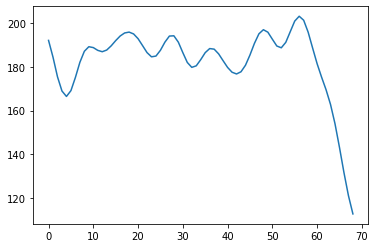

In [12]:
#plt.plot(test.Close)
plt.plot(y_forecasted)

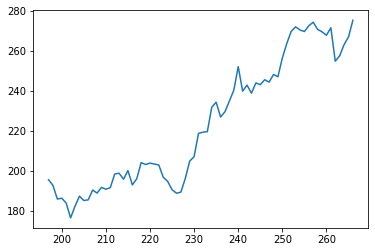

In [13]:
plt.plot(test.Close)

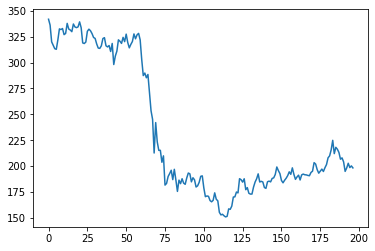

In [14]:
plt.plot(train.Close)

In [15]:
# Let us try the same model with a seasonal dataset 
df1=pd.read_csv("C:\\Users\\Aayush Kandpal\\Downloads\\AirPassengers.csv")

In [16]:
df1.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [19]:
df1=df1.rename(columns={'#Passengers':'Count'})

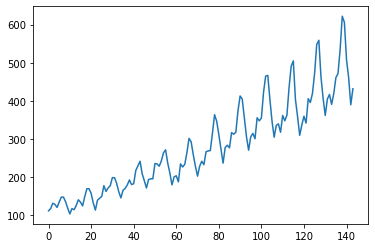

In [20]:
plt.plot(df1.Count)

In [22]:
max(df1.Month)


'1960-12'

In [29]:
df1=df1.dropna()

In [30]:
train,test=df1.loc[df1.Month<='1958-06'],df1.loc[df1.Month>'1958-06']

In [31]:
train.shape,test.shape

((114, 2), (30, 2))

In [88]:
y=train.Count
estimator = TBATS(seasonal_periods=[7,12])

    # Fit model
fitted_model = estimator.fit(y)

    # Forecast 14 steps ahead
y_forecasted = fitted_model.forecast(steps=30)

    # Summarize fitted model
print(fitted_model.summary())


Use Box-Cox: True
Use trend: True
Use damped trend: False
Seasonal periods: [ 7. 12.]
Seasonal harmonics [1 5]
ARMA errors (p, q): (0, 0)
Box-Cox Lambda 0.000000
Smoothing (Alpha): 0.772863
Trend (Beta): 0.041752
Damping Parameter (Phi): 1.000000
Seasonal Parameters (Gamma): [-9.39702002e-08 -3.04462786e-07 -7.27806256e-08  1.18580418e-07]
AR coefficients []
MA coefficients []
Seed vector [ 4.80886110e+00 -7.58844048e-03  1.70191359e-03  6.74238627e-03
 -1.40305610e-01  5.34443102e-02 -9.39355262e-03  7.60534826e-03
  3.90186641e-03  3.04869327e-02  5.97242247e-02 -2.56082654e-02
 -3.70366179e-02 -1.98698479e-02]

AIC 1049.722415


In [89]:
pred=pd.DataFrame({'preds':y_forecasted})
val=pd.DataFrame({'test':test.Count.values})
final=pd.concat([pred,val],axis=1)


In [90]:
final.head()

,preds,test
0,477.662552,491
1,470.133618,505
2,418.170621,404
3,361.719395,359
4,319.558866,310


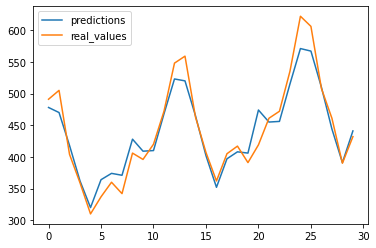

In [92]:
plt.plot(np.round(final.preds),label='predictions')
plt.plot(final.test,label='real_values')
plt.legend()
plt.show()



In [ ]:
# hence proved that TBATS is good for seasonal data only